<a href="https://colab.research.google.com/github/ADRIANVM117/proyectos_propios/blob/main/Estadistica/analisis_exploratorio/Funciones_de_probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contenido 

- Función de masa de probabilidad
- Función de densidad acumulada 
- Función de densidad de probabilidad 
- Estimación de densidad kernel 


## Función de masa de probabilidad (PMF)

- Es una función que devuelve la probabilidad de que una variable aleatoria discreta sea exactamente igual a algun valor. 

  - $ PMF = P_x(x_{k}) = P(X = x_{k} ). k = {1,2,3, ... , n } $

In [1]:
try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.6.3-py3-none-any.whl size=10545 sha256=a2bcf52aabbe3fb7741ba8824f0fd39ae5993abec78afd610fba3fb4d75fbd7a
  Stored in directory: /root/.cache/pip/wheels/be/4d/30/c131cf1cbb0046f14436cdd7a29f4cc8553d34754e3685d071
Successfully built empiricaldist


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from empiricaldist import Pmf # <-- en la biblioteca empiricaldist se ecnuentra la función 
                                    # de masa de probabilidad

In [3]:
import h5py

gss = pd.read_hdf('/content/gss.hdf5', 'gss')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


<b> Poniendo en practica pmf </b>

In [4]:
!pip install empiricaldist 

In [5]:
pmf_year = Pmf.from_seq( gss['year'].dropna(), normalize=False)
print(pmf_year)

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: , dtype: int64


- En 2016 hubo 2867 encuestados 

## Graficando 

- Graficando una pmf de los encuestados por edad

In [6]:
gss_edad = gss['age']

pmf_edad = Pmf.from_seq(gss_edad.dropna(), normalize= True) 
print(pmf_edad)

18.0    0.005620
19.0    0.019878
20.0    0.018111
21.0    0.019219
22.0    0.020247
          ...   
85.0    0.002360
86.0    0.001927
87.0    0.001702
88.0    0.001413
89.0    0.003773
Name: , Length: 72, dtype: float64


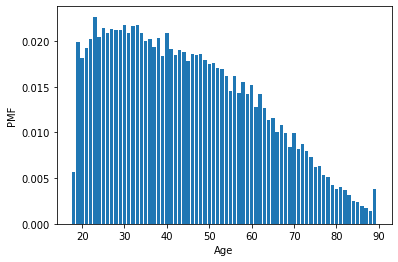

In [7]:
# PMF de edad
age = gss['age'].dropna()
pmf_age = Pmf.from_seq(age)

# Plot the PMF
pmf_age.bar(label = 'educ')

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

Es mas probable que la encuesta sea respondida por jovenes de 23 años. 

In [8]:
pmf_age[23]

0.022671440728312005

- La probabilidad es de 2.267 % 

In [9]:
pmf_age[89]

0.003773221367672324

La probabilidad de una persona de 89 años es de 0.377 % 

# CDF 
## Funcion de probabilidad acumulativa 

- Es la función de probabilidad de que obtengas un valor  $ <= x $

- una CDF es una suma acumulativa de una PMF

### Ejercicio 

- Obtener la probabilidad de que los encuestados tengan 30 años o mas.  

In [10]:
from empiricaldist import Cdf
age = gss['age']

cdf_age = Cdf.from_seq(age)

print(cdf_age[30])

0.2539137136526389


- La probabilidad de que los encuestados se encuentren entre los 30 años es de 25% 

- la fracción de que sean mayores de 30 años es del 75% 


<b> NOTA </b>

- el rango intercuartil (IQR) es la diferencia entre los percentiles 75 y 25. Es una medida de variabilidad que es robusta en presencia de errores o valores extremos.

### Ejercicio. 

calcular el rango intercuartil de los ingresos del gss.


In [11]:
ingresos = gss['realinc']

cdf_ingresos = Cdf.from_seq(ingresos.dropna()) # <-- calculando cdf de los ingresos 

p = .75 #<-- rango intercuartil 

percentil_75th = cdf_ingresos.inverse(p) # Obtenemos el ingreso de ese cuartil 

print(percentil_75th)

43426.0


- dentro del percentil 75 se encuentra un ingreso del 43426 $ 

- ahora calculamos el percentil  25 

In [12]:
p = .25 

percentil_25th = cdf_ingresos.inverse(p)
print(percentil_25th)

13750.0


- dentro del percentil 75 se encuentra un ingreso del 13750 $ 

###  calculamos ahora el rango intercuartil 

In [13]:
iqr = percentil_75th - percentil_25th
print(iqr)

29676.0


- Conclusión: El rango intercuartil de los ingresos dentro del gss es de: 29676 $ 

### Ejercicio 
- CDF de los ingresos de los hogares

Text(0, 0.5, 'CDF')

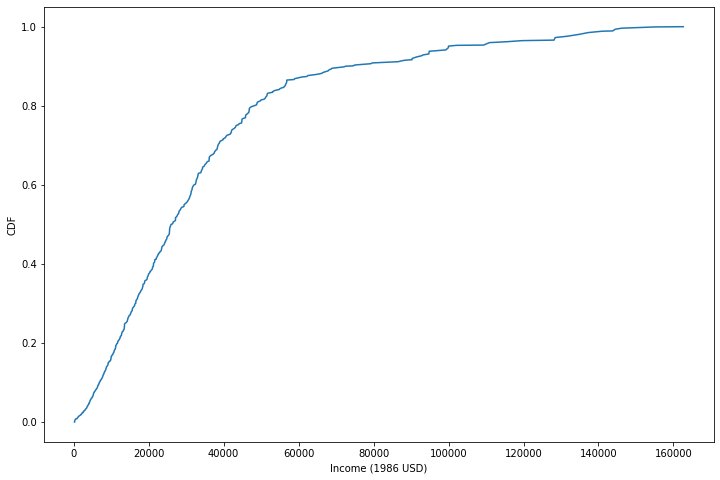

In [14]:
income = gss['realinc']

# CDF
cdf_income = Cdf.from_seq(income)

# graficando
plt.figure(figsize = (12,8))
cdf_income.plot()

# etiquetas

plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')

<b> Ejercicio. </b>

Que fracción de los encuestados tienen 12 años o menos de educación.  

In [15]:
educacion = gss['educ']

cdf_edu = Cdf.from_seq(educacion)

cdf_edu[12]

0.5322611710323575

- Aproximadamente entre el 53 % de los encuentados 

<b>Ejercicio </b>

- Segmentar la población entre diferentes niveles de educación 

- 12 años. termino high school 
- 14 años. termino dos años collage 
- 16 años.termino el collage 

In [16]:
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school
high = (educ <= 12)
print(high.mean())

0.5308807991547402


- alrededor del 53% tiene entre 12 añoso menos de estudios 

<b> Ejericio  </b>

- Graficando los diferentes niveles de ingresos segmentado por sus niveles de estudios 

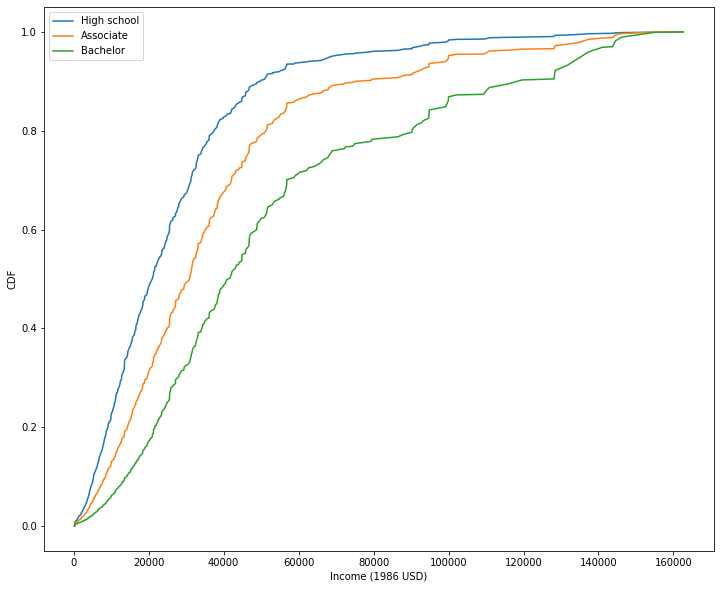

In [21]:
income = gss['realinc']



# Plot the CDFs
plt.figure(figsize = (12,10))
Cdf.from_seq(income[high]).plot(label='High school')
Cdf.from_seq(income[assc]).plot(label='Associate')
Cdf.from_seq(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()


## Función de densidad de probabilidad (PDF)

- La función de densidad de probabilidad muestra la distribución de valores de destino. En destinos continuos, permite determinar la probabilidad de que el destino esté dentro de una región concreta.

<b> EJERCICIO: distribución de los ingresos. </b>


In [22]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = np.mean(log_income)
std = np.std(log_income)
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

4.371148677933652 0.4290043733010077


- Veamos si los ingresos siguen una distribución logaritmica y que se ajuste a una normal. 

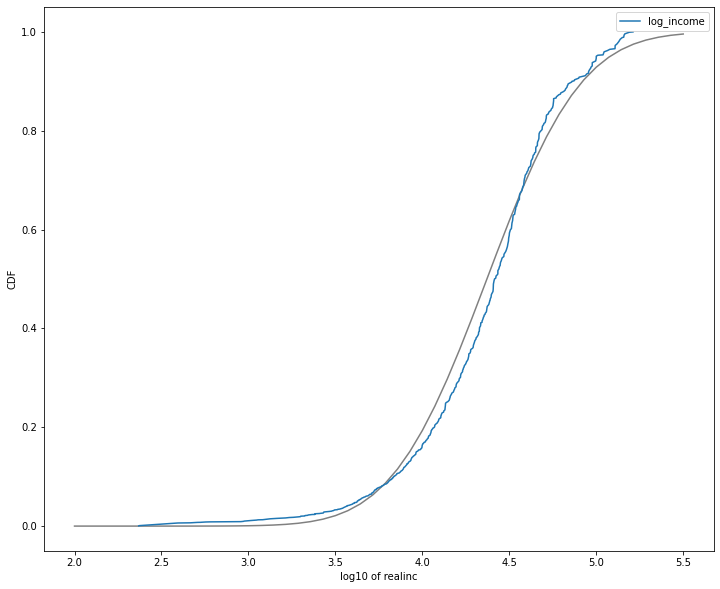

In [29]:
# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.figure(figsize = (12,10))
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf.from_seq(log_income).plot(label = 'log_income')
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.legend()
plt.show()

- La distribución de los ingresos, intuitivamente podemos ver que se ajusta a una logaritmica 

## PDF VS KDE

- KDE: la estimación de densidad de Kernel (KDE) es una forma no paramétrica para estimar la función de densidad de probabilidad de una variable aleatoria.

   - Es una forma de pasar de una PMF a una PDF 



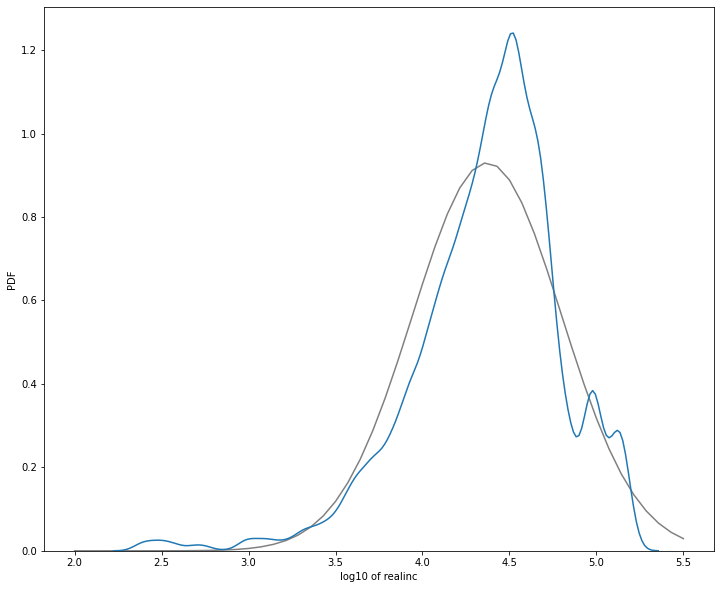

In [30]:
import seaborn as sns 
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.figure(figsize= (12,10))
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

<b> Conclusión </b>